In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

def PointsInCircum(r , n=100):
  return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30) , math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [5]:
df = pd.DataFrame(PointsInCircum(500, 1000))
df = pd.concat([df, pd.DataFrame(PointsInCircum(100, 700))], ignore_index=True)
df = pd.concat([df, pd.DataFrame(PointsInCircum(100, 300))], ignore_index=True)

df = pd.concat([df, pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])], ignore_index=True)

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(df[0] , df[1] ,s=15 , color='grey')
plt.title('Dataset' , fontsize=18)
plt.xlabel('Feature 1' , fontsize=12)
plt.ylabel('Feature 2' , fontsize=12)
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans=KMeans(n_clusters=4 , random_state=42)
kmeans.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

In [9]:
df['KMeans_labels']=kmeans.labels_

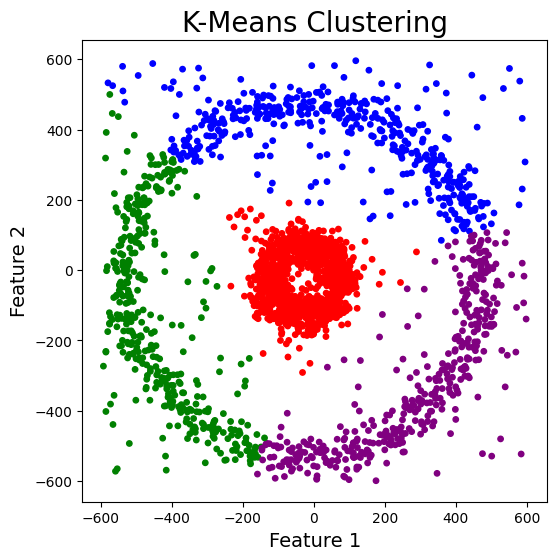

In [10]:
colors=['purple' ,'red' , 'blue' , 'green' ]
plt.figure(figsize=(6,6))
plt.scatter(df[0] , df[1] , c=df['KMeans_labels'] , cmap=matplotlib.colors.ListedColormap(colors) , s=15)
plt.title('K-Means Clustering' , fontsize=20)
plt.xlabel("Feature 1" , fontsize=14)
plt.ylabel("Feature 2" , fontsize=14)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
model=AgglomerativeClustering(n_clusters=4 , metric='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

In [13]:
df['HR_labels']=model.labels_

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(df[0] , df[1] , c=df['HR_labels'] , cmap=matplotlib.colors.ListedColormap(colors) , s=15)
plt.title("Hierarchial Clustering" , fontsize=20)
plt.xlabel("Feature 1" , fontsize=14)
plt.ylabel("Feature 2" , fontsize=14)
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan=DBSCAN(eps=30 , min_samples=6)
dbscan.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [17]:
df['DBSCAN_opt_labels']=dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()

,count
DBSCAN_opt_labels,
0,1044
2,1015
-1,238
1,3


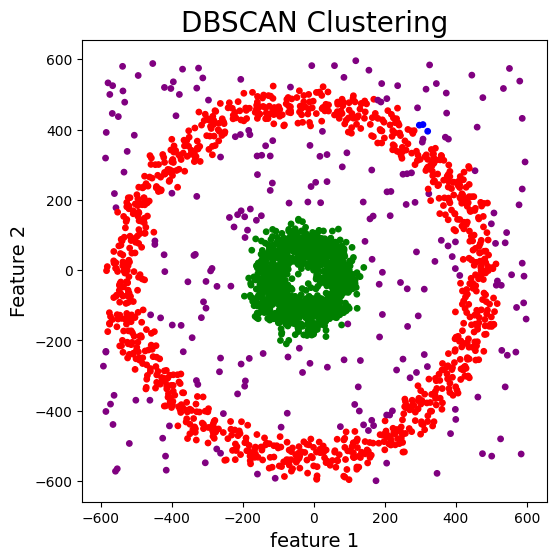

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(df[0] , df[1] , c=df["DBSCAN_opt_labels"] , cmap=matplotlib.colors.ListedColormap(colors) , s=15)
plt.title("DBSCAN Clustering" , fontsize=20)
plt.xlabel("feature 1" , fontsize=14)
plt.ylabel("Feature 2" , fontsize=14)
plt.show()